In [1]:
# Para visualizar los efectos de aplicar una compuerta de 1-cubit, empezamos por definir una serie de
# herramientas para ejecutar y visualizar los circuitos y sus resultados

from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute

In [2]:
# Funcion para ejecutar el circuito en el simulador statevector
# Regresa los resultados, el diagrama de circuito y su diagrama en la esfera de Bloch 
def ejecutar_circuito_sv(quantum_circuit):
    statevector_simulator = Aer.get_backend('statevector_simulator')
    result = execute(quantum_circuit, statevector_simulator).result()
    statevector_results = result.get_statevector(quantum_circuit)
    circuit_diagram = quantum_circuit.draw()
    q_sphere = plot_state_qsphere(statevector_results)
    return statevector_results, circuit_diagram, q_sphere

# Compuerta Pauli Z
La compuerta **Z** de Pauli es tambien denominada la compuerta **fase** porque su efecto de rotacion actua sobre el eje longitudinal del espacio de Hilbert, y por lo tanto, tiene un efecto en el factor de fase de un sistema cuantico. La siguiente table muestra el efecto que tiene en un sistema inicializado en alguno de los vectores base de la base estandar. Esta transformacion añade un facto de fase negativo cuando es aplicado al estado |1> y este efecto tiene muchas aplicaciones en diversos algoritmos cuanticos

| Input | Output | 
|-------|--------|
| \|0>  | \|0>   | 
| \|1>  | -\|1>   | 

In [3]:
qc = QuantumCircuit(1)

In [4]:
qc.z(0)

In [5]:
result, img, qsphere = ejecutar_circuito_sv(qc)

In [6]:
result

array([ 1.+0.j, -0.+0.j])

In [7]:
img

┌───┐
q_0: ┤ Z ├
     └───┘

/usr/local/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:57: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


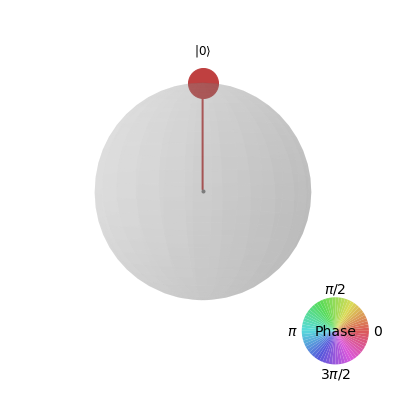

In [8]:
qsphere

In [13]:
# Para realmente entender el efecto de la compuerta Z, vamos a aplicar la compuerta H primero.

qch = QuantumCircuit(1)

In [14]:
qch.h(0)
qch.z(0)

result, img, qsphere = ejecutar_circuito_sv(qch)

In [15]:
result

array([ 0.70710678+0.j, -0.70710678+0.j])

In [16]:
img

┌───┐┌───┐
q_0: ┤ H ├┤ Z ├
     └───┘└───┘

/usr/local/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:57: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


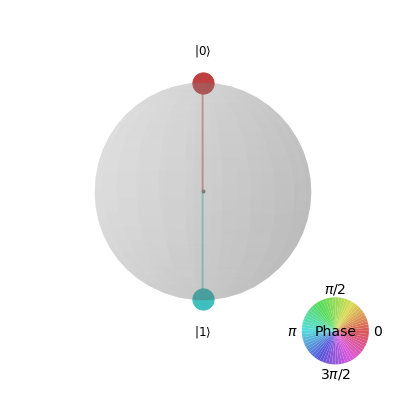

In [17]:
qsphere

Lo que podemos observar en esta representacion en la esfera de Bloch, es que nuestro sistema de un cubit, tiene igual probabilidad de encontrarse en el estado |0> o |1>. Sin embargo, el estado |1> que observamos, ha sido rotado por un angulo de pi. Por lo tanto, podemos concluir que la compuerta Z de Pauli, tiene la capacidad de aplicar un cambio de fase, es decir aplicar un factor negativo a un estado arbitratio del cubit. 

In [18]:
# Ahora vamos a ver el efecto de aplicar una compuerta X de Pauli antes de aplicar la compuerta Z

qcx = QuantumCircuit(1)
qcx.x(0)
qcx.z(0)

In [19]:
result, img, qsphere = ejecutar_circuito_sv(qcx)

In [20]:
result

array([ 0.+0.j, -1.+0.j])

In [21]:
img

┌───┐┌───┐
q_0: ┤ X ├┤ Z ├
     └───┘└───┘

/usr/local/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:57: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


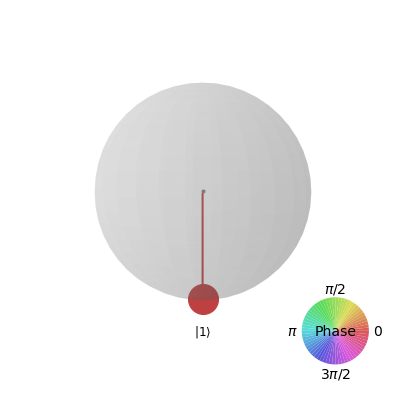

In [22]:
qsphere

## Compuertas de tipo fase

Ahora vamos a explorar el efecto de las compuertas que transforman un estado |1> a $e^{i\phi}|1>$. Este factor adicional, no tiene un efecto en la probabilidad de encontrar nuestro sistema en el estado |0> o |1>, simplemente afecta la fase del sistema cuantico, que se vuelve relevante cuando tenemos un sistema con mas de un cubit.

### La compuerta S

La compuerta S tiene un efecto similar al de la compuerta Z de Pauli, la diferencia es el factor por el que se rota un vector determinado. Su tabla de logica es la siguiente:

| Input | Output | 
|-------|--------|
| \|0>  | \|0>   | 
| \|1>  | $e^{i\frac{\pi}{\sqrt{2}}}\|1>$   | 

In [30]:

qcs = QuantumCircuit(1)
qcs.h(0)
qcs.s(0)

In [33]:
result, img, qsphere = ejecutar_circuito_sv(qcs)

In [34]:
result

array([ 0.70710678+0.j        , -0.        +0.70710678j])

In [35]:
img

┌───┐┌───┐
q_0: ┤ H ├┤ S ├
     └───┘└───┘

/usr/local/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:57: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


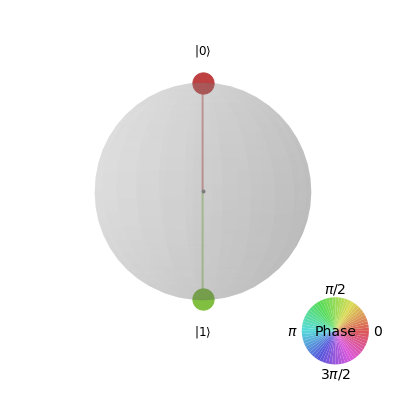

In [36]:
qsphere

### La compuerta T

La compuerta T tiene un efecto similar al de la compuerta S, la diferencia es el factor por el que se rota un vector determinado. Su tabla de logica es la siguiente:

| Input | Output | 
|-------|--------|
| \|0>  | \|0>   | 
| \|1>  | $e^{i\frac{\pi}{\sqrt{4}}}\|1>$   | 

In [37]:
qct = QuantumCircuit(1)
qct.h(0)
qct.t(0)

In [38]:
result, img, qsphere = ejecutar_circuito_sv(qct)

In [39]:
result

array([0.70710678+0.j , 0.5       +0.5j])

In [40]:
img

┌───┐┌───┐
q_0: ┤ H ├┤ T ├
     └───┘└───┘

/usr/local/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:57: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


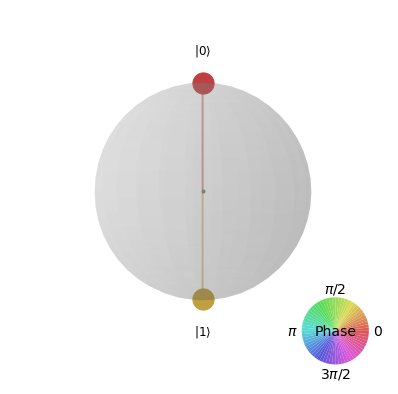

In [41]:
qsphere

In [46]:
# Ahora el adjunto de la compuerta T

qctd = QuantumCircuit(1)
qctd.h(0)
qctd.tdg(0)

In [47]:
result, img, qsphere = ejecutar_circuito_sv(qctd)

In [48]:
result

array([0.70710678+0.j , 0.5       -0.5j])

In [49]:
img

┌───┐┌─────┐
q_0: ┤ H ├┤ TDG ├
     └───┘└─────┘

/usr/local/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:57: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


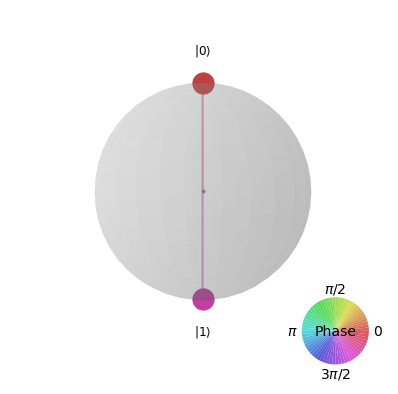

In [50]:
qsphere